# Latihan Cuaca

*   Nama: Diah Ayu Puspasari
*   NIM: 0110223052
*   Data Engineering 02 Pagi







In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# menghubungkan gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/datasciece/dataset'

# Membuka file ke dalam data frame dengan pd

In [4]:
# membaca file csv menggunakan pandas
mydata = pd.read_csv(path + '/2016-weather.csv')
mydata

,Date/Time,Month,Mean Temp,Total Precip (mm),Total Snow (cm),Snow on Grnd (cm)
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
4,2016-01-05,1,NaN,1.4,NaN,44.0
...,...,...,...,...,...,...
361,2016-12-27,12,-3.5,2.0,NaN,81.0
362,2016-12-28,12,-0.5,3.4,6.2,78.0
363,2016-12-29,12,-0.8,19.6,NaN,78.0
364,2016-12-30,12,-2.0,0.0,0.0,98.0


# Rename Kolom

In [5]:
# melihat datatype dan spesfikasi data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          366 non-null    object 
 1   Month              366 non-null    int64  
 2   Mean Temp          331 non-null    float64
 3   Total Precip (mm)  356 non-null    float64
 4   Total Snow (cm)    107 non-null    float64
 5   Snow on Grnd (cm)  335 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [6]:
mydata.columns = ['Tanggal', 'Bulan', 'Rata rata suhu', 'Curah Hujan mm', 'Salju Total cm', 'Salju di Tanah cm']

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            366 non-null    object 
 1   Bulan              366 non-null    int64  
 2   Rata rata suhu     331 non-null    float64
 3   Curah Hujan mm     356 non-null    float64
 4   Salju Total cm     107 non-null    float64
 5   Salju di Tanah cm  335 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [8]:
mydata.columns = mydata.columns.str.replace(' ', '_')

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            366 non-null    object 
 1   Bulan              366 non-null    int64  
 2   Rata_rata_suhu     331 non-null    float64
 3   Curah_Hujan_mm     356 non-null    float64
 4   Salju_Total_cm     107 non-null    float64
 5   Salju_di_Tanah_cm  335 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


# Hari dengan suhu di bawah 4c

In [10]:
mydata.head()

,Tanggal,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
4,2016-01-05,1,NaN,1.4,NaN,44.0


In [14]:
# menampilkan data dengan suhu dibawah 4 derajat celcius
mydata[mydata['Rata_rata_suhu'] < 4]

,Tanggal,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
5,2016-01-06,1,-4.0,0.0,NaN,45.0
...,...,...,...,...,...,...
361,2016-12-27,12,-3.5,2.0,NaN,81.0
362,2016-12-28,12,-0.5,3.4,6.2,78.0
363,2016-12-29,12,-0.8,19.6,NaN,78.0
364,2016-12-30,12,-2.0,0.0,0.0,98.0


In [15]:
# menampilkan hari yang memiliki suhu di bawah 4 derajat celcius
mydata[mydata['Rata_rata_suhu'] < 4]['Tanggal']

,Tanggal
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
5,2016-01-06
...,...
361,2016-12-27
362,2016-12-28
363,2016-12-29
364,2016-12-30


# Menampilkan data sesuai tanggal lahir (Februari)

In [22]:
# menampilkan data dengan kolom bulan '2'
mydata[mydata['Bulan'] == 2]

,Tanggal,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
31,2016-02-01,2,-0.4,0.0,NaN,57.0
32,2016-02-02,2,-2.9,0.0,NaN,55.0
33,2016-02-03,2,-2.9,7.2,NaN,54.0
34,2016-02-04,2,-0.6,2.2,NaN,63.0
35,2016-02-05,2,1.4,66.0,NaN,55.0
36,2016-02-06,2,1.5,1.0,NaN,58.0
37,2016-02-07,2,0.0,2.9,NaN,59.0
38,2016-02-08,2,2.5,0.0,NaN,58.0
39,2016-02-09,2,2.4,0.0,NaN,57.0
40,2016-02-10,2,NaN,7.3,NaN,56.0


# Rata Rata per Bulan

In [29]:
# menghitung rata rata kolom Rata_rata_suhu	Curah_Hujan_mm	Salju_Total_cm	Salju_di_Tanah_cm perbulan
rata_bulanan = mydata.groupby('Bulan')[['Rata_rata_suhu', 'Curah_Hujan_mm', 'Salju_Total_cm', 'Salju_di_Tanah_cm']].mean()
print("Rata Rata per Bulan tiap Kolom:\n\n", rata_bulanan)

Rata Rata per Bulan tiap Kolom:

        Rata_rata_suhu  Curah_Hujan_mm  Salju_Total_cm  Salju_di_Tanah_cm
Bulan                                                                   
1           -2.432143        6.051613        4.730000          52.666667
2            1.511111        7.234483        0.140000          50.448276
3            4.046429        7.230000        0.076923          24.071429
4            9.896154        1.551724        0.000000           0.000000
5           12.546154        1.880000        0.000000           0.000000
6           13.747826        2.837037        0.000000           0.000000
7           16.303846        0.948387        0.000000           0.000000
8           17.720690        0.938710        0.000000           0.000000
9           11.707143        1.000000        0.000000           0.000000
10           5.780645        8.019355        0.275000           0.000000
11           4.089286        7.889286        3.714286           5.666667
12          -5.92

# Menangani Missing Value

In [30]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            366 non-null    object 
 1   Bulan              366 non-null    int64  
 2   Rata_rata_suhu     331 non-null    float64
 3   Curah_Hujan_mm     356 non-null    float64
 4   Salju_Total_cm     107 non-null    float64
 5   Salju_di_Tanah_cm  335 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [32]:
mydata.isna().sum()

,0
Tanggal,0
Bulan,0
Rata_rata_suhu,35
Curah_Hujan_mm,10
Salju_Total_cm,259
Salju_di_Tanah_cm,31


In [33]:
mydata

,Tanggal,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
4,2016-01-05,1,NaN,1.4,NaN,44.0
...,...,...,...,...,...,...
361,2016-12-27,12,-3.5,2.0,NaN,81.0
362,2016-12-28,12,-0.5,3.4,6.2,78.0
363,2016-12-29,12,-0.8,19.6,NaN,78.0
364,2016-12-30,12,-2.0,0.0,0.0,98.0


In [34]:
mydata.describe()

,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
count,366.000000,331.000000,356.000000,107.000000,335.000000
mean,6.513661,7.133535,4.051966,1.318692,15.044776
std,3.455958,7.884795,7.844048,4.414879,23.488456
min,1.000000,-14.800000,0.000000,0.000000,0.000000
25%,4.000000,1.900000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,0.600000,0.000000,0.000000
75%,9.750000,13.500000,4.200000,0.000000,34.000000
max,12.000000,22.800000,66.000000,29.400000,98.000000


In [36]:
mydata['Rata_rata_suhu'] = mydata.groupby('Bulan')['Rata_rata_suhu'].transform(lambda x: x.fillna(x.mean()))
# karena ada nya pola musiman dan bersifat musiman

mydata['Curah_Hujan_mm'] = mydata['Curah_Hujan_mm'].fillna(0)
# bisa aja karena tidak setiap hari hujan

mydata['Salju_Total_cm'] = mydata['Salju_Total_cm'].fillna(0)
# bisa aja karena tidak setiap hari ada salju

mydata['Salju_di_Tanah_cm'] = mydata.groupby('Bulan')['Salju_di_Tanah_cm'].transform(lambda x: x.fillna(x.mean()))
# karena ada nya pola musiman

In [37]:
mydata.describe()

,Bulan,Rata_rata_suhu,Curah_Hujan_mm,Salju_Total_cm,Salju_di_Tanah_cm
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,6.513661,7.421226,3.941257,0.385519,15.127382
std,3.455958,7.770756,7.764077,2.453811,23.346578
min,1.000000,-14.800000,0.000000,0.000000,0.000000
25%,4.000000,2.225000,0.000000,0.000000,0.000000
50%,7.000000,8.000000,0.600000,0.000000,0.000000
75%,9.750000,13.747826,4.000000,0.000000,34.000000
max,12.000000,22.800000,66.000000,29.400000,98.000000


In [39]:
mydata.isna().sum()

,0
Tanggal,0
Bulan,0
Rata_rata_suhu,0
Curah_Hujan_mm,0
Salju_Total_cm,0
Salju_di_Tanah_cm,0


# Diagram Plot

## Rata Rata suhu harian selama setahun

<Axes: xlabel='Tanggal'>

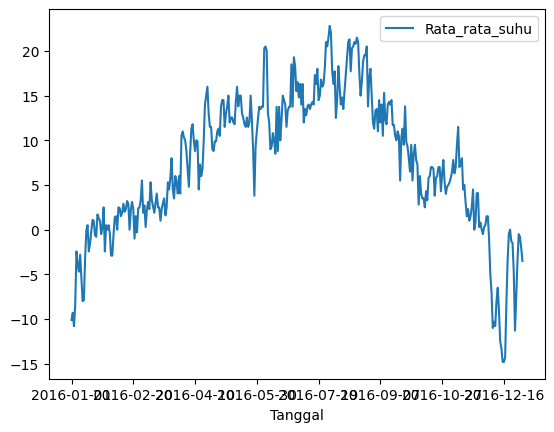

In [40]:
# menampilkan diagram plot rata rata suhu harian selama setahun
mydata.plot(x='Tanggal', y='Rata_rata_suhu', kind='line')

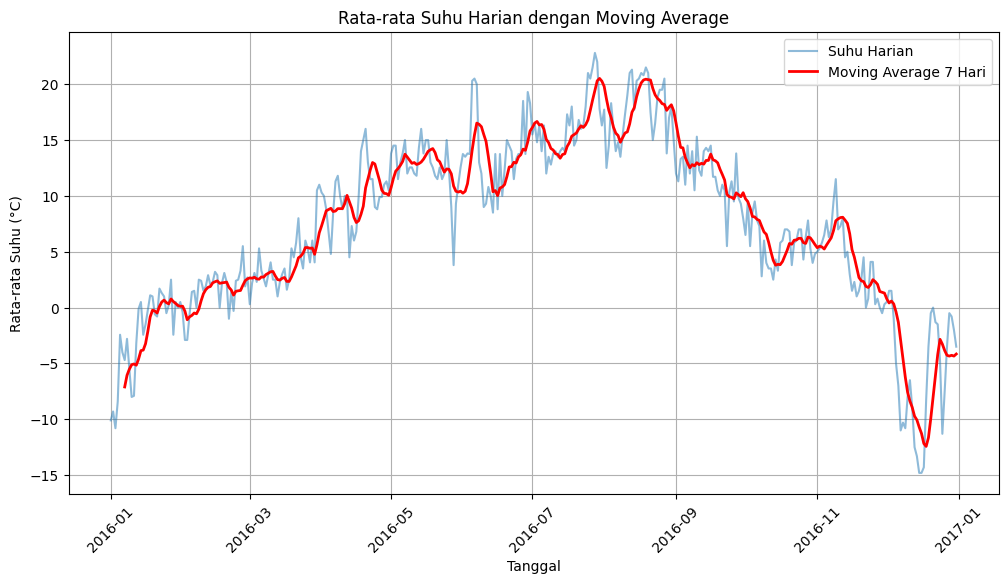

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'Tanggal' dalam format datetime
mydata['Tanggal'] = pd.to_datetime(mydata['Tanggal'])

# Hitung Moving Average 7 Hari
mydata['Suhu_MA7'] = mydata['Rata_rata_suhu'].rolling(window=7).mean()

# Plot suhu harian
plt.figure(figsize=(12, 6))
plt.plot(mydata['Tanggal'], mydata['Rata_rata_suhu'], label='Suhu Harian', alpha=0.5)

# Plot Moving Average 7 Hari
plt.plot(mydata['Tanggal'], mydata['Suhu_MA7'], label='Moving Average 7 Hari', color='red', linewidth=2)

# Format grafik agar lebih jelas
plt.xticks(rotation=45)  # Rotasi label tanggal agar tidak berantakan
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Rata-rata Suhu Harian dengan Moving Average")
plt.legend()
plt.grid(True)  # Tambahkan grid agar lebih mudah dibaca

# Tampilkan plot
plt.show()

Tren Umum Suhu

*   Awal Tahun (Januari - Maret): Suhu awalnya rendah, di bawah 0°C, lalu perlahan meningkat.
*   Pertengahan Tahun (Mei - Agustus): Suhu mencapai puncaknya, sering berada di atas 15°C, bahkan mendekati 25°C pada beberapa titik.
*   Akhir Tahun (September - Desember): Suhu mulai menurun kembali, dengan tren menurun tajam menjelang Desember.

Jadi,
*   Musim panas terjadi sekitar Juni - Agustus, di mana suhu tertinggi mencapai lebih dari 20°C.
*   Musim dingin terjadi sekitar Desember - Januari, dengan suhu bisa turun hingga -10°C atau lebih rendah.

Ada beberapa puncak suhu yang naik tiba-tiba, mungkin akibat perubahan cuaca ekstrem


Dengan Moving Average Tren suhu terlihat lebih jelas, membantu melihat pola kenaikan dan penurunan suhu sepanjang tahun.




## Ketebalan Salju selama setahun

<Axes: xlabel='Tanggal'>

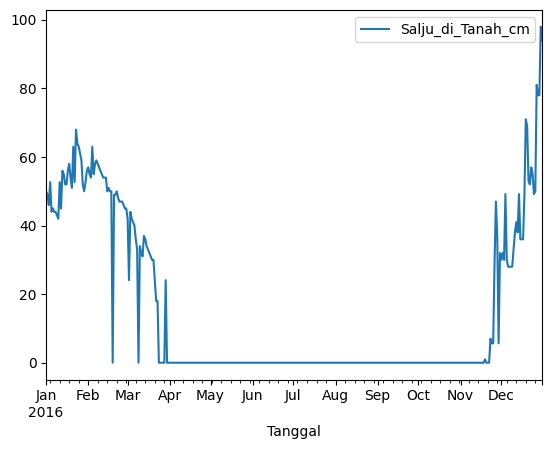

In [43]:
# Menampilkan diagram plot ketebalan salju selama setahun
mydata.plot(x='Tanggal', y='Salju_di_Tanah_cm', kind='line')


*   Januari - Maret: Salju cukup tebal, berkisar antara 40 - 70 cm, dengan fluktuasi yang signifikan.
*   April - Oktober: Hampir tidak ada salju, menunjukkan bahwa musim ini kemungkinan adalah musim panas atau periode dengan suhu tinggi.
*   November - Desember: Ketebalan salju kembali meningkat dengan cepat, mendekati 100 cm di akhir tahun, yang menandakan awal musim dingin.







# Challenge

In [46]:
# menampilkan data tanggal, suhu, curah hujan, dan salju yang ada pada setiap tanggal 22
data_tanggal_22 = mydata.query("Tanggal.dt.day == 22")[['Tanggal', 'Rata_rata_suhu', 'Curah_Hujan_mm', 'Salju_di_Tanah_cm']]
data_tanggal_22

,Tanggal,Rata_rata_suhu,Curah_Hujan_mm,Salju_di_Tanah_cm
21,2016-01-22,1.700000,10.8,52.666667
52,2016-02-22,1.511111,0.0,50.000000
81,2016-03-22,8.000000,0.4,18.000000
112,2016-04-22,11.500000,6.0,0.000000
142,2016-05-22,12.546154,0.8,0.000000
173,2016-06-22,14.000000,4.0,0.000000
203,2016-07-22,16.000000,0.0,0.000000
234,2016-08-22,15.000000,0.0,0.000000
265,2016-09-22,10.500000,2.2,0.000000
295,2016-10-22,5.800000,1.0,0.000000
